Assignment: Tutorial - GS Tools

Author: Kevin Brown

Course: MINE552 - Applied Geostatistics

Instructor: Eli Miskovic

Credit: Tutorial content provided by Sebastian Müller

Source: https://github.com/GeoStat-Examples/gstools-transform22-tutorial

Conda Env: t22-gstools

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.ioff()
# turn of warnings
import warnings
warnings.filterwarnings('ignore')

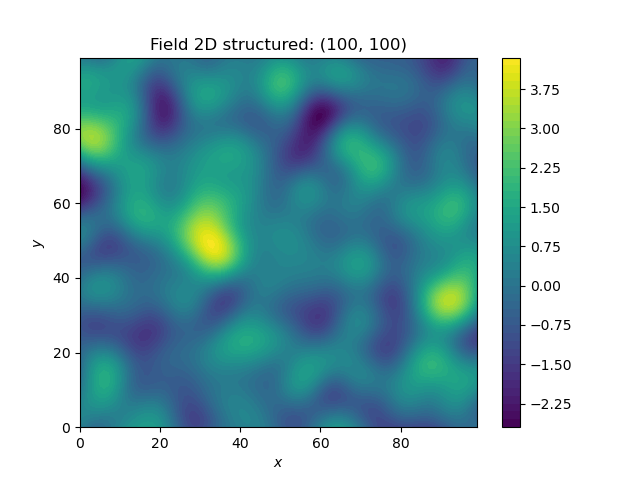

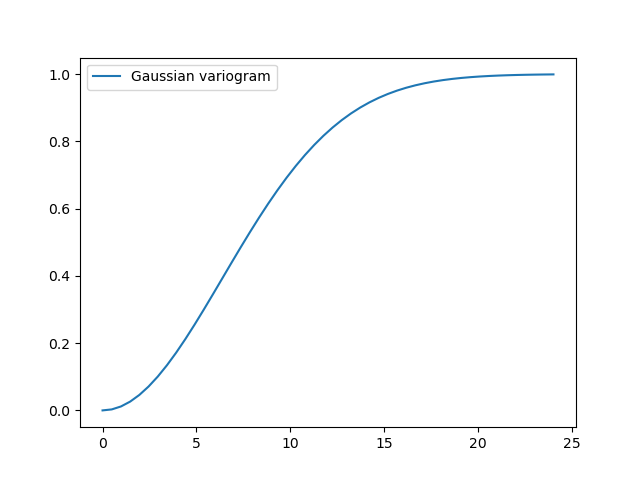

<Axes: >

In [8]:
import gstools as gs
# structured field with a size 100x100 and a grid-size of 1x1
x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=8)
srf = gs.SRF(model)
srf((x, y), mesh_type='structured')
srf.plot()
model.plot()

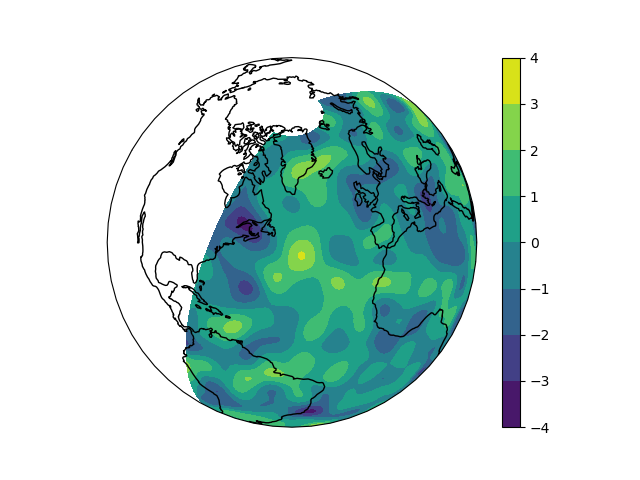

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gstools as gs
# define a structured field by latitude and longitude
lat = lon = range(-80, 81)
model = gs.Gaussian(latlon=True, len_scale=777, rescale=gs.EARTH_RADIUS)
srf = gs.SRF(model, seed=12345)
field = srf.structured((lat, lon))
# Orthographic plotting with cartopy
plt.figure()
ax = plt.subplot(projection=ccrs.Orthographic(-45, 45))
cont = ax.contourf(lon, lat, field, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.colorbar(cont)
plt.show()

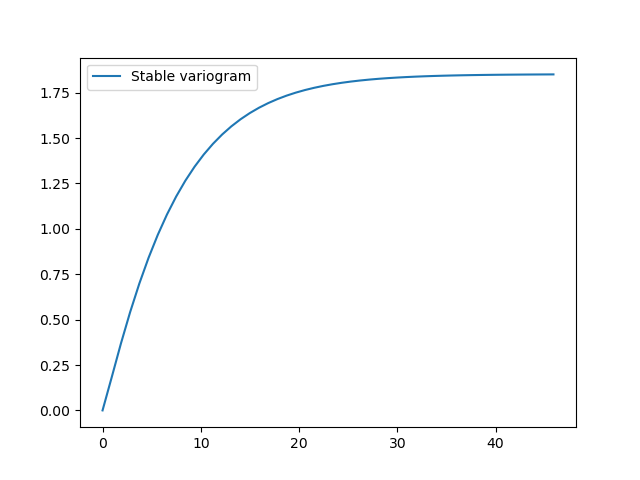

Stable(dim=2, var=1.85, len_scale=7.42, nugget=0.0, alpha=1.09)


In [12]:
import numpy as np
import gstools as gs
# generate a synthetic field with an exponential model
x = np.random.RandomState(19970221).rand(1000) * 100.
y = np.random.RandomState(20011012).rand(1000) * 100.
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0, seed=19970221)
field = srf((x, y))
# estimate the variogram of the field
bin_center, gamma = gs.vario_estimate((x, y), field)
# fit the variogram with a stable model. (no nugget fitted)
fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=False)
# output
ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
print(fit_model)

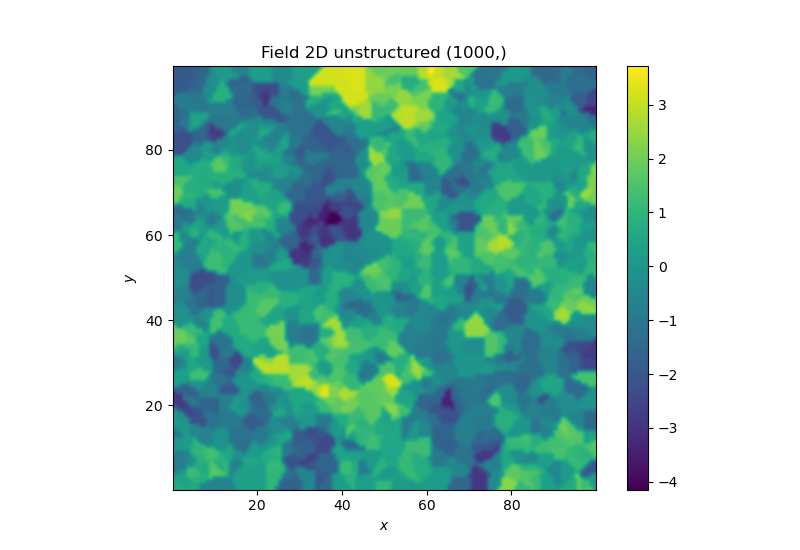

<Axes: title={'center': 'Field 2D unstructured (1000,)'}, xlabel='$x$', ylabel='$y$'>

In [14]:
srf.plot(contour_plot=False)